In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = h5py.File('../Outfile_CellInformation_HomDet_2to5GeV.h5','r')

In [3]:
gT = h5py.File('../DATA_PROCESSING/Outfile_TopoClusterTotal.h5','r')
gTA = h5py.File('../DATA_PROCESSING/Outfile_TopoClusterTotalAtl.h5','r')

In [4]:
#Compute total energy in the event
def En_Eve(fi,ev, types):   
    En = 0
    EnL = 0
    for i in range(1,7):
        Lay_En = fi['RealRes_'+str(types)+'Energy_Layer'+str(i)][ev][0]
            
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    
        Lay_En=np.array(Lay_En[0:size,0:size])
        EnL=np.sum(Lay_En)
        #print(EnL,i)
        En = En+EnL      
    return En

#compute the energy in each topo per event
def En_Topo(gi, fi, types, ev):
    En = 0
    EnL = 0
    EnTopo = []
    for i in range(1,7):
        Topo = gi['TopoClusters'+str(i)][ev][0]
        Calo = fi['RealRes_'+str(types)+'Energy_Layer'+str(i)][ev][0]
            
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    
            
        TopoA=np.array(Topo[0:size,0:size])
        CaloA=np.array(Calo[0:size,0:size])

        for X in range(len(TopoA)):
            for Y in range(len(TopoA)): 
                TopoI=int(TopoA[X][Y])
                if TopoI!=0:
                    #print(X, Y, "En=",Calo[X][Y],'Topo N =', TopoI, 'layer =', i)
                    if len(EnTopo)<TopoI: EnTopo.append(Calo[X][Y])
                    else: EnTopo[TopoI-1]=EnTopo[TopoI-1]+CaloA[X][Y]     
    return EnTopo




In [5]:
#count numb cells in topoclust
def Count_Cells(gi, j):
    Counter = []
    for i in range(1,7):
        Topo = gi['TopoClusters'+str(i)][j][0]

        #Size of layers not well defined in tools_generic.py
        #resetting of sizes
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    

        TopoA=np.array(Topo[0:size,0:size])

        #print(len(TopoA)
        for X in range(len(TopoA)):
            for Y in range(len(TopoA)): 
                TopoI=int(TopoA[X][Y])
                if TopoI!=0:
                    #print(TopoA[X][Y], Counter, X, Y)
                    if len(Counter)<TopoI: Counter.append(1)
                    else: Counter[TopoI-1]=Counter[TopoI-1]+1

    return np.array(Counter)

In [7]:
#print(En_Topo(g,0, 'Charged'))
#print(En_Topo(g,0,'Neutral'))
events=len(gT['TopoClusters1'])
Rho_Clus_P=[]
Rho_Clus_N=[]
N_Cell=[]

print("loop")
for ev in range(events):
    if (ev+1)%100==0: print("Still looping, Ev = ", ev+1)
    
    Charged_Topo=En_Topo(gT,f,'Charged', ev) 
    Neutral_Topo=En_Topo(gT,f,'Neutral', ev) 
    Total_Topo=En_Topo(gT,f,'Total',ev)
    
    Count_Cell=Count_Cells(gT, ev)
    i=0
    #j=-10
    while i<len(Total_Topo): 
        Rho_Clus_P.append(Charged_Topo[i]/Total_Topo[i] )
        Rho_Clus_N.append(Neutral_Topo[i]/Total_Topo[i] )
        
        N_Cell.append(Count_Cell[i])
        i+=1
        
#print(N_Topo40/k, k)
    

loop
Still looping, Ev =  100
Still looping, Ev =  200
Still looping, Ev =  300
Still looping, Ev =  400
Still looping, Ev =  500
Still looping, Ev =  600
Still looping, Ev =  700
Still looping, Ev =  800
Still looping, Ev =  900
Still looping, Ev =  1000


In [8]:
events=len(gTA['TopoClusters1'])
Rho_Clus_PA=[]
Rho_Clus_NA=[]
N_CellA=[]

print("loop")
for ev in range(events):
    if (ev+1)%1000==0: print("Still looping, Ev = ", ev+1)
    
    Charged_Topo=En_Topo(gTA,f,'Charged', ev) 
    Neutral_Topo=En_Topo(gTA,f,'Neutral', ev) 
    Total_Topo=En_Topo(gTA,f,'Total',ev)
    
    Count_Cell=Count_Cells(gTA, ev)
    i=0
    #j=-10
    while i<len(Total_Topo): 
        Rho_Clus_PA.append(Charged_Topo[i]/Total_Topo[i] )
        Rho_Clus_NA.append(Neutral_Topo[i]/Total_Topo[i] )
        
        N_CellA.append(Count_Cell[i])
        i+=1



loop
Still looping, Ev =  1000


<Figure size 432x288 with 0 Axes>

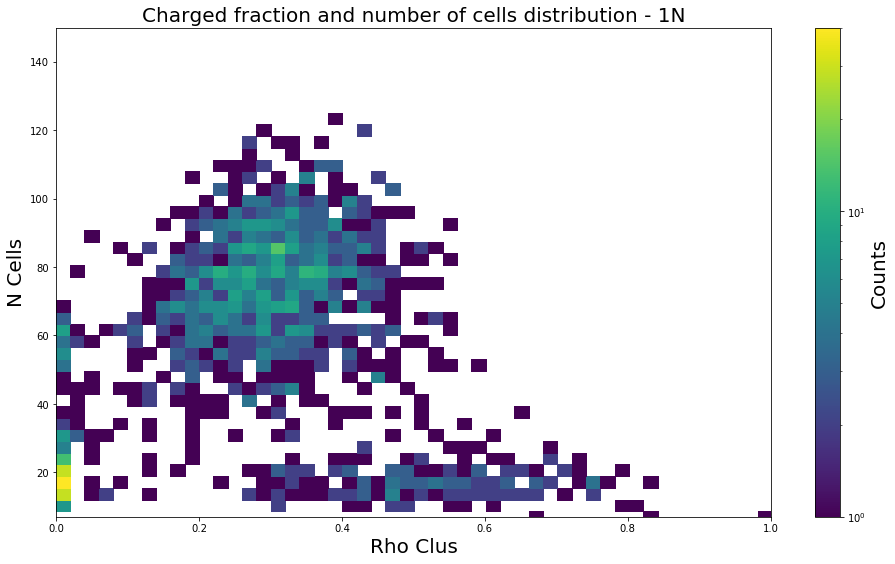

In [23]:
import matplotlib as mpl
import matplotlib.colors as colors


fig2 = plt.figure()
ax = plt.subplots(figsize=(16,9))

plt.hist2d(Rho_Clus_PA, N_CellA,bins=(50,35), norm=mpl.colors.LogNorm())
plt.xlabel('Rho Clus', fontsize=20)
plt.ylabel('N Cells', fontsize=20)
plt.title("Charged fraction and number of cells distribution - 1N", fontsize=20)
plt.xlim(0 ,1)
plt.ylim(7,150)


cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts',  fontsize=20)

plt.savefig("Rho_Cell_Charged - 2N.png")

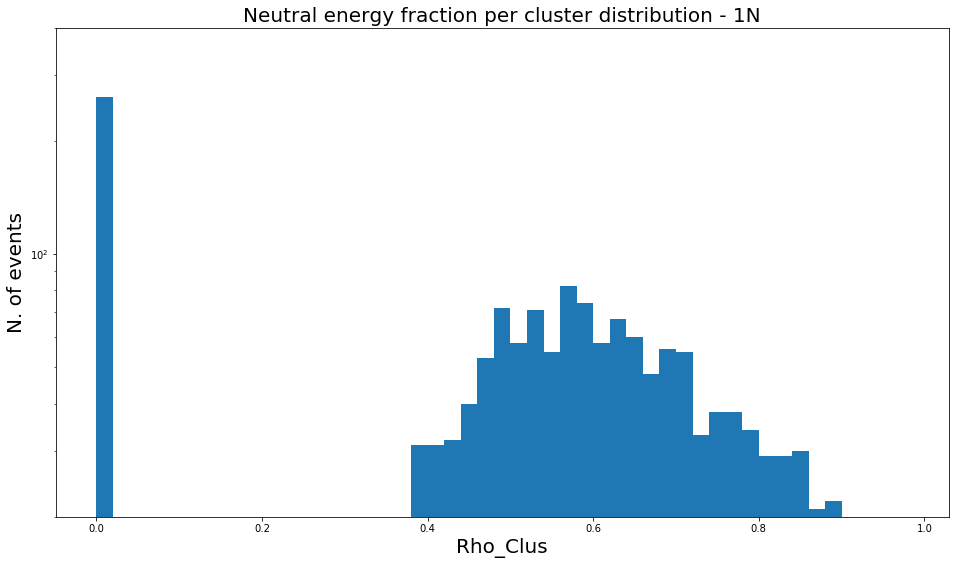

In [43]:
bins = list(np.array(range(0,50))/50)
#tick= bins[:-1]+np.ones(len(bins))[1:]/2

hist, bins = np.histogram(Rho_Clus_N, bins=bins )
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(16,9))
ax.bar(center, hist, align='center', width=width)
#ax.set_xticks(tick)
ax.set_xlabel("Rho_Clus", fontsize=20)
ax.set_ylabel("N. of events", fontsize=20)
ax.set_title("Neutral energy fraction per cluster distribution - 1N", fontsize=20)
plt.yscale('log')
plt.ylim(20, 400)

#saving set
plt.savefig("Rho_Clus_Neutral - 1N.png")
plt.show()